In [1]:
import os
os.chdir("C:/Users/Xtage/OneDrive - Xtage Technologies Private Limited/UTec - Map Detection")
import config
import cv2
import numpy as np
from matplotlib import pyplot as plt    

Folder 'C:/Users/Xtage/OneDrive - Xtage Technologies Private Limited/UTec - Map Detection/Output/006_Sample_Maps' already exists.
Folder 'C:/Users/Xtage/OneDrive - Xtage Technologies Private Limited/UTec - Map Detection/Output/006_Sample_Maps/01_Images/001_Edges' already exists.
Folder 'C:/Users/Xtage/OneDrive - Xtage Technologies Private Limited/UTec - Map Detection/Output/006_Sample_Maps/01_Images/002_Hough_Lines' already exists.


In [2]:
def create_blank_image(image):
    # Get the height and width of the image
    height, width, _ = image.shape

    # Create a blank image of the same size
    blank_image = np.ones((height, width, 3), np.uint8) * 255

    return blank_image

In [3]:
config.dir_prj_ip 

'C:/Users/Xtage/OneDrive - Xtage Technologies Private Limited/UTec - Map Detection/Input/006_Sample_Maps'

64
648
62
357
668
672
669
59
585
54
204
58
58
324
583
61
66
652
84
582
59
581
320
322
662
344
118
60
59
653
63
215
54
97
54
63
222
148
670
650
372
269
54
320
99
65
58
60
55
584
283
59
54
62
374
131
83
284
70
671
487
58
270
60
130
62
92
58
82
54
90
82
105
54
59
73
99
82
86
90
139
58
83
109
173
267
74
58
271
58
81
114
58
71
132


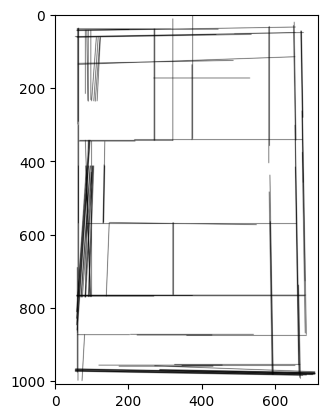

In [4]:
gray = cv2.imread(config.dir_prj_ip + "/" + config.prj_id + ".png")
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite(config.dir_prj_op_edges + "/" + "Edges.png",edges)
minLineLength=100 * 1
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=90)

plt.imshow(edges)

blank_image = create_blank_image(gray)

a,b,c = lines.shape
gray = cv2.imread(config.dir_prj_ip + "/" + config.prj_id + ".png")
for i in range(a):
    print(lines[i][0][0])
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 0), 1, cv2.LINE_AA)
    # if i == 0:
    #     break

plt.imshow(blank_image)

In [7]:
lines[:3]

array([[[ 64, 772,  64,  37]],

       [[648,  30, 665, 991]],

       [[ 62, 999,  62, 302]]], dtype=int32)

In [69]:
horizontal_lines = sorted(horizontal_lines, key=lambda line: line[0][1])  # Sort lines based on x coordinates
grouped_lines_horizontal = []
horizontal_lines

[array([[ 59,  40, 316,  40]], dtype=int32),
 array([[ 59,  41, 444,  41]], dtype=int32),
 array([[ 58,  44, 202,  42]], dtype=int32),
 array([[487,  53, 654,  50]], dtype=int32),
 array([[ 58,  62, 438,  55]], dtype=int32),
 array([[ 59,  63, 534,  55]], dtype=int32),
 array([[ 62, 134, 485, 126]], dtype=int32),
 array([[267, 174, 530, 174]], dtype=int32),
 array([[215, 342, 672, 342]], dtype=int32),
 array([[ 66, 344, 321, 344]], dtype=int32),
 array([[ 65, 346, 218, 346]], dtype=int32),
 array([[148, 568, 548, 574]], dtype=int32),
 array([[ 84, 571, 657, 571]], dtype=int32),
 array([[ 58, 766, 682, 766]], dtype=int32),
 array([[ 58, 767, 374, 767]], dtype=int32),
 array([[ 58, 768, 679, 768]], dtype=int32),
 array([[ 58, 769, 269, 769]], dtype=int32),
 array([[204, 873, 540, 873]], dtype=int32),
 array([[ 60, 874, 203, 874]], dtype=int32),
 array([[222, 875, 427, 875]], dtype=int32),
 array([[357, 876, 684, 876]], dtype=int32),
 array([[324, 955, 667, 955]], dtype=int32),
 array([[1

In [70]:
if horizontal_lines:
    current_group = [horizontal_lines[0]]
    print("step 01: cg", current_group)

    for i in range(1, len(horizontal_lines)):
        # Check the difference between y coordinates
        if abs(horizontal_lines[i][0][1] - horizontal_lines[i-1][0][1]) < 10:
            current_group.append(horizontal_lines[i])
            print("step 02: ag", horizontal_lines[i])
        else:
            grouped_lines_horizontal.append(current_group)
            current_group = [horizontal_lines[i]]

    grouped_lines_horizontal.append(current_group)

grouped_lines_horizontal


step 01: cg [array([[ 59,  40, 316,  40]], dtype=int32)]
step 02: ag [[ 59  41 444  41]]
step 02: ag [[ 58  44 202  42]]
step 02: ag [[487  53 654  50]]
step 02: ag [[ 58  62 438  55]]
step 02: ag [[ 59  63 534  55]]
step 02: ag [[ 66 344 321 344]]
step 02: ag [[ 65 346 218 346]]
step 02: ag [[ 84 571 657 571]]
step 02: ag [[ 58 767 374 767]]
step 02: ag [[ 58 768 679 768]]
step 02: ag [[ 58 769 269 769]]
step 02: ag [[ 60 874 203 874]]
step 02: ag [[222 875 427 875]]
step 02: ag [[357 876 684 876]]
step 02: ag [[118 957 455 957]]
step 02: ag [[344 958 653 958]]
step 02: ag [[173 960 430 960]]
step 02: ag [[284 969 707 977]]
step 02: ag [[283 970 707 978]]


[[array([[ 59,  40, 316,  40]], dtype=int32),
  array([[ 59,  41, 444,  41]], dtype=int32),
  array([[ 58,  44, 202,  42]], dtype=int32),
  array([[487,  53, 654,  50]], dtype=int32),
  array([[ 58,  62, 438,  55]], dtype=int32),
  array([[ 59,  63, 534,  55]], dtype=int32)],
 [array([[ 62, 134, 485, 126]], dtype=int32)],
 [array([[267, 174, 530, 174]], dtype=int32)],
 [array([[215, 342, 672, 342]], dtype=int32),
  array([[ 66, 344, 321, 344]], dtype=int32),
  array([[ 65, 346, 218, 346]], dtype=int32)],
 [array([[148, 568, 548, 574]], dtype=int32),
  array([[ 84, 571, 657, 571]], dtype=int32)],
 [array([[ 58, 766, 682, 766]], dtype=int32),
  array([[ 58, 767, 374, 767]], dtype=int32),
  array([[ 58, 768, 679, 768]], dtype=int32),
  array([[ 58, 769, 269, 769]], dtype=int32)],
 [array([[204, 873, 540, 873]], dtype=int32),
  array([[ 60, 874, 203, 874]], dtype=int32),
  array([[222, 875, 427, 875]], dtype=int32),
  array([[357, 876, 684, 876]], dtype=int32)],
 [array([[324, 955, 667, 95

In [71]:
grouped_lines_horizontal

[[array([[ 59,  40, 316,  40]], dtype=int32),
  array([[ 59,  41, 444,  41]], dtype=int32),
  array([[ 58,  44, 202,  42]], dtype=int32),
  array([[487,  53, 654,  50]], dtype=int32),
  array([[ 58,  62, 438,  55]], dtype=int32),
  array([[ 59,  63, 534,  55]], dtype=int32)],
 [array([[ 62, 134, 485, 126]], dtype=int32)],
 [array([[267, 174, 530, 174]], dtype=int32)],
 [array([[215, 342, 672, 342]], dtype=int32),
  array([[ 66, 344, 321, 344]], dtype=int32),
  array([[ 65, 346, 218, 346]], dtype=int32)],
 [array([[148, 568, 548, 574]], dtype=int32),
  array([[ 84, 571, 657, 571]], dtype=int32)],
 [array([[ 58, 766, 682, 766]], dtype=int32),
  array([[ 58, 767, 374, 767]], dtype=int32),
  array([[ 58, 768, 679, 768]], dtype=int32),
  array([[ 58, 769, 269, 769]], dtype=int32)],
 [array([[204, 873, 540, 873]], dtype=int32),
  array([[ 60, 874, 203, 874]], dtype=int32),
  array([[222, 875, 427, 875]], dtype=int32),
  array([[357, 876, 684, 876]], dtype=int32)],
 [array([[324, 955, 667, 95

In [55]:
[x[0][0] for x in grouped_lines_horizontal]

[array([ 58, 768, 679, 768], dtype=int32),
 array([ 58,  62, 438,  55], dtype=int32),
 array([ 58, 767, 374, 767], dtype=int32),
 array([ 58,  44, 202,  42], dtype=int32),
 array([ 58, 769, 269, 769], dtype=int32),
 array([ 59,  63, 534,  55], dtype=int32),
 array([ 59,  40, 316,  40], dtype=int32),
 array([ 60, 874, 203, 874], dtype=int32),
 array([ 62, 134, 485, 126], dtype=int32),
 array([ 65, 346, 218, 346], dtype=int32),
 array([ 84, 571, 657, 571], dtype=int32),
 array([118, 957, 455, 957], dtype=int32),
 array([148, 568, 548, 574], dtype=int32),
 array([173, 960, 430, 960], dtype=int32),
 array([204, 873, 540, 873], dtype=int32),
 array([215, 342, 672, 342], dtype=int32),
 array([222, 875, 427, 875], dtype=int32),
 array([267, 174, 530, 174], dtype=int32),
 array([283, 970, 707, 978], dtype=int32),
 array([324, 955, 667, 955], dtype=int32),
 array([357, 876, 684, 876], dtype=int32),
 array([487,  53, 654,  50], dtype=int32),
 array([ 58, 768, 679, 768], dtype=int32),
 array([ 58

In [135]:
grouped_lines_horizontal_max = []
for index, grp in enumerate(grouped_lines_horizontal):
    grouped_lines_horizontal_max.append([np.array([grp[0][0][0], grp[0][0][1], max([x[0][2] for x in grp]), grp[0][0][3]], dtype=np.int32)])

In [136]:
grouped_lines_horizontal_max

[[array([ 59,  40, 654,  40])],
 [array([ 62, 134, 485, 126])],
 [array([267, 174, 530, 174])],
 [array([215, 342, 672, 342])],
 [array([148, 568, 657, 574])],
 [array([ 58, 766, 682, 766])],
 [array([204, 873, 684, 873])],
 [array([324, 955, 707, 955])]]

In [138]:
# horizontal_lines_first = [x[0][0] for x in grouped_lines_horizontal_max]
horizontal_lines_first_adjusted = [np.array([x[0][0], x[0][1], x[0][2], x[0][1]], dtype=np.int32) for x in grouped_lines_horizontal_max]
grouped_lines_horizontal_max, horizontal_lines_first_adjusted

([[array([ 59,  40, 654,  40])],
  [array([ 62, 134, 485, 126])],
  [array([267, 174, 530, 174])],
  [array([215, 342, 672, 342])],
  [array([148, 568, 657, 574])],
  [array([ 58, 766, 682, 766])],
  [array([204, 873, 684, 873])],
  [array([324, 955, 707, 955])]],
 [array([ 59,  40, 654,  40]),
  array([ 62, 134, 485, 134]),
  array([267, 174, 530, 174]),
  array([215, 342, 672, 342]),
  array([148, 568, 657, 568]),
  array([ 58, 766, 682, 766]),
  array([204, 873, 684, 873]),
  array([324, 955, 707, 955])])

In [92]:
vertical_lines = sorted(vertical_lines, key=lambda line: line[0][0])  # Sort lines based on y coordinates
grouped_lines_vertical = []
vertical_lines

[array([[ 60, 977,  60, 690]], dtype=int32),
 array([[ 61, 301,  61,  38]], dtype=int32),
 array([[ 62, 999,  62, 302]], dtype=int32),
 array([[ 63, 293,  63,  38]], dtype=int32),
 array([[ 63, 570,  63, 413]], dtype=int32),
 array([[ 64, 772,  64,  37]], dtype=int32),
 array([[  73, 1000,   80,  873]], dtype=int32),
 array([[ 82, 217,  82,  43]], dtype=int32),
 array([[ 82, 772,  90, 343]], dtype=int32),
 array([[ 86,  43,  89, 236]], dtype=int32),
 array([[ 90, 238,  90,  43]], dtype=int32),
 array([[ 97, 234,  97,  43]], dtype=int32),
 array([[ 99, 771,  99, 346]], dtype=int32),
 array([[114, 237, 123,  63]], dtype=int32),
 array([[130, 570, 133, 410]], dtype=int32),
 array([[131, 570, 135, 347]], dtype=int32),
 array([[132, 568, 135, 413]], dtype=int32),
 array([[139, 770, 147, 568]], dtype=int32),
 array([[269, 345, 269,  39]], dtype=int32),
 array([[271, 345, 271,  39]], dtype=int32),
 array([[320, 345, 320,  12]], dtype=int32),
 array([[320, 765, 320, 568]], dtype=int32),
 array

In [106]:
grouped_lines_vertical = []
if vertical_lines:
    current_group = [vertical_lines[0]]

    for i in range(1, len(vertical_lines)):
        # Check the difference between y coordinates
        if (abs(vertical_lines[i][0][0] - vertical_lines[i-1][0][0])) < 10:
            current_group.append(vertical_lines[i])
            # print("detected")
        else:
            grouped_lines_vertical.append(current_group)
            current_group = [vertical_lines[i]]

        # if i == 1:
        #     break

    grouped_lines_vertical.append(current_group)

grouped_lines_vertical


[[array([[ 60, 977,  60, 690]], dtype=int32),
  array([[ 61, 301,  61,  38]], dtype=int32),
  array([[ 62, 999,  62, 302]], dtype=int32),
  array([[ 63, 293,  63,  38]], dtype=int32),
  array([[ 63, 570,  63, 413]], dtype=int32),
  array([[ 64, 772,  64,  37]], dtype=int32),
  array([[  73, 1000,   80,  873]], dtype=int32),
  array([[ 82, 217,  82,  43]], dtype=int32),
  array([[ 82, 772,  90, 343]], dtype=int32),
  array([[ 86,  43,  89, 236]], dtype=int32),
  array([[ 90, 238,  90,  43]], dtype=int32),
  array([[ 97, 234,  97,  43]], dtype=int32),
  array([[ 99, 771,  99, 346]], dtype=int32)],
 [array([[114, 237, 123,  63]], dtype=int32)],
 [array([[130, 570, 133, 410]], dtype=int32),
  array([[131, 570, 135, 347]], dtype=int32),
  array([[132, 568, 135, 413]], dtype=int32),
  array([[139, 770, 147, 568]], dtype=int32)],
 [array([[269, 345, 269,  39]], dtype=int32),
  array([[271, 345, 271,  39]], dtype=int32)],
 [array([[320, 345, 320,  12]], dtype=int32),
  array([[320, 765, 320, 5

In [107]:
grouped_lines_vertical


[[array([[ 60, 977,  60, 690]], dtype=int32),
  array([[ 61, 301,  61,  38]], dtype=int32),
  array([[ 62, 999,  62, 302]], dtype=int32),
  array([[ 63, 293,  63,  38]], dtype=int32),
  array([[ 63, 570,  63, 413]], dtype=int32),
  array([[ 64, 772,  64,  37]], dtype=int32),
  array([[  73, 1000,   80,  873]], dtype=int32),
  array([[ 82, 217,  82,  43]], dtype=int32),
  array([[ 82, 772,  90, 343]], dtype=int32),
  array([[ 86,  43,  89, 236]], dtype=int32),
  array([[ 90, 238,  90,  43]], dtype=int32),
  array([[ 97, 234,  97,  43]], dtype=int32),
  array([[ 99, 771,  99, 346]], dtype=int32)],
 [array([[114, 237, 123,  63]], dtype=int32)],
 [array([[130, 570, 133, 410]], dtype=int32),
  array([[131, 570, 135, 347]], dtype=int32),
  array([[132, 568, 135, 413]], dtype=int32),
  array([[139, 770, 147, 568]], dtype=int32)],
 [array([[269, 345, 269,  39]], dtype=int32),
  array([[271, 345, 271,  39]], dtype=int32)],
 [array([[320, 345, 320,  12]], dtype=int32),
  array([[320, 765, 320, 5

In [108]:
[x[0][0] for x in grouped_lines_vertical]

[array([ 60, 977,  60, 690], dtype=int32),
 array([114, 237, 123,  63], dtype=int32),
 array([130, 570, 133, 410], dtype=int32),
 array([269, 345, 269,  39], dtype=int32),
 array([320, 345, 320,  12], dtype=int32),
 array([372, 343, 372, 137], dtype=int32),
 array([581, 406, 581,  34], dtype=int32),
 array([650,  21, 655, 344], dtype=int32)]

In [109]:
vertical_lines_first = [x[0][0] for x in grouped_lines_vertical]
vertical_lines_first_adjusted = [np.array([x[0], x[1], x[0], x[3]], dtype=np.int32) for x in vertical_lines_first]
vertical_lines_first, vertical_lines_first_adjusted

([array([ 60, 977,  60, 690], dtype=int32),
  array([114, 237, 123,  63], dtype=int32),
  array([130, 570, 133, 410], dtype=int32),
  array([269, 345, 269,  39], dtype=int32),
  array([320, 345, 320,  12], dtype=int32),
  array([372, 343, 372, 137], dtype=int32),
  array([581, 406, 581,  34], dtype=int32),
  array([650,  21, 655, 344], dtype=int32)],
 [array([ 60, 977,  60, 690]),
  array([114, 237, 114,  63]),
  array([130, 570, 130, 410]),
  array([269, 345, 269,  39]),
  array([320, 345, 320,  12]),
  array([372, 343, 372, 137]),
  array([581, 406, 581,  34]),
  array([650,  21, 650, 344])])

In [110]:
vertical_lines_first_adjusted

[array([ 60, 977,  60, 690]),
 array([114, 237, 114,  63]),
 array([130, 570, 130, 410]),
 array([269, 345, 269,  39]),
 array([320, 345, 320,  12]),
 array([372, 343, 372, 137]),
 array([581, 406, 581,  34]),
 array([650,  21, 650, 344])]

In [111]:
blank_image.shape

(1009, 718, 3)

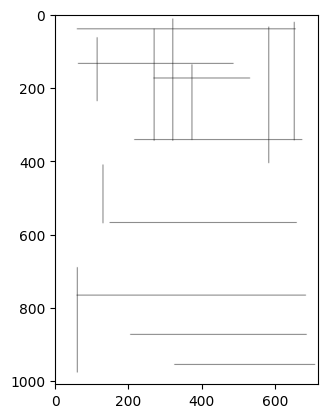

In [139]:
gray = cv2.imread(config.dir_prj_ip + "/" + config.prj_id + ".png")
blank_image = create_blank_image(gray)

a,b,c = lines.shape
for index, line in enumerate(horizontal_lines_first_adjusted):
    # print(line)
    cv2.line(blank_image, (line[0], line[1]), (line[2], line[3]), (0, 0, 0), 1, cv2.LINE_AA)
    # if index == 2:
    #     break

for index, line in enumerate(vertical_lines_first_adjusted):
    # print(line)
    cv2.line(blank_image, (line[0], line[1]), (line[2], line[3]), (0, 0, 0), 1, cv2.LINE_AA)
    # if index == 2:
    #     break


plt.imshow(blank_image)

In [ ]:
# Ladder Detection
# 

In [24]:
gray = cv2.imread(config.dir_prj_ip + "/" + config.prj_id + ".png")
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite(config.dir_prj_op_edges + "/" + "Edges.png",edges)
minLineLength=100 * 1
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=90)
# Assume 'lines' is obtained using cv2.HoughLinesP

# Create lists to store horizontal and vertical lines
horizontal_lines = []
vertical_lines = []

# Define thresholds for grouping lines
y_threshold = 10  # Adjust according to your requirements for horizontal lines
x_threshold = 10  # Adjust according to your requirements for vertical lines

# Iterate through each line
for line in lines:
    x1, y1, x2, y2 = line[0]  # Extract line coordinates

    # Check if the line is approximately horizontal
    if abs(y2 - y1) < y_threshold:
        horizontal_lines.append(line)
    # Check if the line is approximately vertical
    elif abs(x2 - x1) < x_threshold:
        vertical_lines.append(line)

# Function to group lines based on the specified threshold
def group_lines_horizontal(lines, threshold):
    lines = sorted(lines, key=lambda line: line[0][0])  # Sort lines based on x coordinates
    grouped_lines = []

    if lines:
        current_group = lines[0]

        for i in range(1, len(lines)):
            # Check the difference between y coordinates
            if abs(lines[i][0][1] - lines[i-1][0][1]) < threshold:
                # current_group.append(lines[i])
                print("detected")
            else:
                grouped_lines.append(current_group)
                current_group = lines[i]

        grouped_lines.append(current_group)

    return grouped_lines


def group_lines_vertical(lines, threshold):
    lines = sorted(lines, key=lambda line: line[0][1])  # Sort lines based on y coordinates
    grouped_lines = []

    if lines:
        current_group = lines[0]

        for i in range(1, len(lines)):
            # Check the difference between y coordinates
            if abs(lines[i][0][1] - lines[i-1][0][1]) < threshold:
                # current_group.append(lines[i])
                print("detected")
            else:
                grouped_lines.append(current_group)
                current_group = lines[i]

        grouped_lines.append(current_group)

    return grouped_lines


# Group horizontal lines
grouped_horizontal_lines = group_lines_horizontal(horizontal_lines, y_threshold)

# Group vertical lines
grouped_vertical_lines = group_lines_vertical(vertical_lines, x_threshold)

# Now 'grouped_horizontal_lines' and 'grouped_vertical_lines' contain lists of lines grouped based on the specified thresholds


detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected


In [56]:
for i in range(grouped_horizontal_lines):
    print(lines[i][0][0])
    cv2.line(blank_image, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 0), 1, cv2.LINE_AA)
    if i == 0:
        break

plt.imshow(blank_image)

TypeError: 'list' object cannot be interpreted as an integer

In [68]:
grouped_horizontal_lines

[array([[115,  28, 356,  28]], dtype=int32),
 array([[ 67, 136, 220, 136]], dtype=int32),
 array([[234, 199, 590, 205]], dtype=int32),
 array([[294, 244, 629, 244]], dtype=int32),
 array([[197, 264, 624, 264]], dtype=int32),
 array([[ 66, 294, 676, 294]], dtype=int32),
 array([[ 98, 370, 268, 367]], dtype=int32),
 array([[139, 392, 402, 392]], dtype=int32)]

In [72]:
import cv2
import numpy as np

# Assume 'lines' is obtained using cv2.HoughLinesP

# ... (Previous code for separating and grouping lines)

# Get the height and width of the image (you may adjust these values)
blank_image = create_blank_image(image=gray)  # White background

# Function to draw lines on the image
def draw_lines(image, lines, color=(0, 0, 255), thickness=1):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)

# Draw grouped horizontal lines on the blank image
for group in grouped_horizontal_lines:
    print(group)
    draw_lines(blank_image, group, color=(0, 0, 255), thickness=2)

# Draw grouped vertical lines on the blank image
for group in grouped_vertical_lines:
    print(group)
    draw_lines(blank_image, group, color=(0, 255, 0), thickness=2)
    
plt.imshow(blank_image)

[[115  28 356  28]]


TypeError: 'numpy.intc' object is not iterable

True

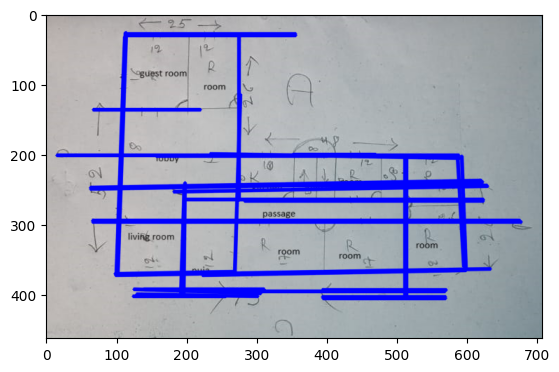

In [4]:

cv2.imwrite(config.dir_prj_op_hough + "/" + "HoughLines.png",gray)
